# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

In [125]:
import requests
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

### Черная пятница. Ноябрь 2021 года
В 2021 году 1 ноября стартовала черная пятница. На текущий день (24.11.2021) она все еще продолжается. Тем не менее событие близится к концу, поэтому хочу проанализировать именно этот потенциально очень активный период сообщества.

In [1]:
def getjson(url):
    response = requests.get(url)
    response = response.json()
    return response

In [ ]:
vk_token = # your vk_token here

In [107]:
# Возьмем последние 70 записей сообщества (нас интересуют последние 24 дня, бегло взглянув на частоту публикаций 
# за последние несколько дней можно предположить, что выбранного числа записей хватит, чтобы зацепить интересующий период)
url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&offset=0&count=70&v=5.131'

response = getjson(url)

In [108]:
# С помощью pd.json_normalize создадим удобный для анализа pandas датафрейм
df = pd.json_normalize(response['response']['items'])
df

,id,from_id,owner_id,date,marked_as_ads,post_type,text,is_pinned,attachments,is_favorite,...,likes.count,likes.user_likes,likes.can_publish,reposts.count,reposts.user_reposted,views.count,donut.is_donut,edited,copy_history,post_source.platform
0,215343,-66669811,-66669811,1635762751,0,post,"Нет, это не шутка! Попробовать 34 курса и инте...",1.0,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,226,0,1,414,0,37142,False,NaN,NaN,NaN
1,221044,-66669811,-66669811,1637657897,0,post,Сегодня культовой World of Warcraft исполняетс...,NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,11,0,1,10,0,7863,False,NaN,NaN,NaN
2,220918,-66669811,-66669811,1637574806,0,post,На этой неделе научимся превращать рисунок в д...,NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,23,0,1,18,0,13948,False,NaN,NaN,NaN
3,220886,-66669811,-66669811,1637569352,0,post,Понедельник — день тяжелый! Чтобы сделать его ...,NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,396,0,1,342,0,33686,False,NaN,NaN,NaN
4,220798,-66669811,-66669811,1637481020,0,post,"Дизайнер не всегда бывает под рукой, а иногда ...",NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,54,0,1,56,0,28855,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,212949,-66669811,-66669811,1634282004,0,post,"У нас нет дела любимее, чем рассказывать об ус...",NaN,"[{'type': 'video', 'video': {'access_key': '7a...",False,...,16,0,1,5,0,20644,False,1.634283e+09,NaN,NaN
66,212886,-66669811,-66669811,1634225357,0,post,"Что нужно сделать, чтобы процесс обучения и тр...",NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,25,0,1,16,0,18482,False,NaN,NaN,NaN
67,212715,-66669811,-66669811,1634139989,0,post,Андре Толедо приедет в Москву на Disrupt Marke...,NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,13,0,1,3,0,19640,False,1.634140e+09,NaN,NaN
68,212598,-66669811,-66669811,1634111280,0,post,"К счастью, не все люди ходят на работу только ...",NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,...,507,0,1,455,0,27601,False,NaN,NaN,NaN


In [109]:
# Т.к. мы работаем с последними постами сообщества, сохраним df, чтобы новые публикуемые посты не мешали аналитической 
# работе, а выводы сохраняли актуальность для отобранных данных.
df.to_csv('coursework_2_black_friday.csv')

# Загружаем dataframe

In [571]:
# Загружаем df
df = pd.read_csv('coursework_2_black_friday.csv', index_col=0)

In [144]:
# Для начала стоит отобрать наиболее интересующие нас столбцы, чтобы было проще работать с данными.
df_interest_columns = df[['date','text','comments.count','likes.count','reposts.count','views.count']].copy()
df_interest_columns.head()

,date,text,comments.count,likes.count,reposts.count,views.count
0,1635762751,"Нет, это не шутка! Попробовать 34 курса и инте...",58,226,414,37142
1,1637657897,Сегодня культовой World of Warcraft исполняетс...,12,11,10,7863
2,1637574806,На этой неделе научимся превращать рисунок в д...,2,23,18,13948
3,1637569352,Понедельник — день тяжелый! Чтобы сделать его ...,8,396,342,33686
4,1637481020,"Дизайнер не всегда бывает под рукой, а иногда ...",0,54,56,28855


In [145]:
# Создадим функцию, которая преобразует все значеня столбца date в читаемое человеком значение.

def raw_date_to_readable(raw_date):
    return (datetime.fromtimestamp(raw_date) - timedelta(hours=0)).strftime('%Y-%m-%d %H:%M:%S')

In [146]:
# Применяем функцию и создаем столбец с читаемой датой
df_interest_columns['readable_date'] = df.date.apply(raw_date_to_readable)

In [148]:
df_interest_columns.head(2)

,date,text,comments.count,likes.count,reposts.count,views.count,readable_date
0,1635762751,"Нет, это не шутка! Попробовать 34 курса и инте...",58,226,414,37142,2021-11-01 13:32:31
1,1637657897,Сегодня культовой World of Warcraft исполняетс...,12,11,10,7863,2021-11-23 11:58:17


In [149]:
# Теперь нужно оставимь только посты за текущий месяц. Сейчас воспользуемся datetime и создадим столбец с номером месяца
def date_month(raw_date):
    return (datetime.fromtimestamp(raw_date) - timedelta(hours=0)).strftime('%m')

In [162]:
# Применяем функцию, оставляем только месяц
df_interest_columns['month'] = df_interest_columns.date.apply(date_month)
df_interest_columns.head(2)

,date,text,comments.count,likes.count,reposts.count,views.count,readable_date,month
0,1635762751,"Нет, это не шутка! Попробовать 34 курса и инте...",58,226,414,37142,2021-11-01 13:32:31,11
1,1637657897,Сегодня культовой World of Warcraft исполняетс...,12,11,10,7863,2021-11-23 11:58:17,11


In [233]:
# Сохраним данный в переменнду df_event
df_event = df_interest_columns[df_interest_columns.month == '11'].copy()
df_event.head(2)

,date,text,comments.count,likes.count,reposts.count,views.count,readable_date,month
0,1635762751,"Нет, это не шутка! Попробовать 34 курса и инте...",58,226,414,37142,2021-11-01 13:32:31,11
1,1637657897,Сегодня культовой World of Warcraft исполняетс...,12,11,10,7863,2021-11-23 11:58:17,11


In [181]:
# Вероятно, будет интересно сравнить данные события "черной пятницы" с данными до ее начала. 
# Наш изначальный дф имел 70 записей, на период события выпало 35 строк, остальную половину запишем в отдельный df.
# Запишем их в переменную df_other

df_other = df_interest_columns[df_interest_columns.month != '11'].copy()
df_other.reset_index(drop=True, inplace = True)
df_other.head(2)

,date,text,comments.count,likes.count,reposts.count,views.count,readable_date,month
0,1635668176,В детстве нас пугали зловещими Пиковыми дамами...,6,47,28,21936,2021-10-31 11:16:16,10
1,1635596798,С каждым новым постом про С++ наши карточки ст...,0,40,22,18108,2021-10-30 15:26:38,10


In [221]:
# Посмотрим на агреггированные данные во время события
event_statistics = df_event.iloc[:,[2,3,4,5]].agg(['mean','median','min','max','sum'])
event_statistics

,comments.count,likes.count,reposts.count,views.count
mean,7.428571,108.542857,98.257143,21382.285714
median,0.000000,26.000000,18.000000,18598.000000
min,0.000000,5.000000,1.000000,7863.000000
max,58.000000,909.000000,873.000000,44461.000000
sum,260.000000,3799.000000,3439.000000,748380.000000


In [223]:
# Взглянем на данные за аналогичное число постов в "обычное" время
without_event = df_other.iloc[:,[2,3,4,5]].agg(['mean','median','min','max','sum'])
without_event

,comments.count,likes.count,reposts.count,views.count
mean,6.228571,119.914286,102.085714,19526.971429
median,6.000000,40.000000,22.000000,19028.000000
min,0.000000,8.000000,3.000000,13372.000000
max,37.000000,706.000000,656.000000,28027.000000
sum,218.000000,4197.000000,3573.000000,683444.000000


In [224]:
# Для удобства поиска разницы вычтем из значений агрегированных данных за время события данные из второй таблицы.
# Но нельзя забыть, что не все "посты" набрали адекватное кол-во просмотров, лайков и прочего, т.к. они 
# находятся максимально близко к текущему дню и трудно оценить их реальный показатель, скажем, через хотя бы неделю.
# Иными словами, показатели из df event_statistics в действительности занижены.
event_statistics - without_event

,comments.count,likes.count,reposts.count,views.count
mean,1.2,-11.371429,-3.828571,1855.314286
median,-6.0,-14.000000,-4.000000,-430.000000
min,0.0,-3.000000,-2.000000,-5509.000000
max,21.0,203.000000,217.000000,16434.000000
sum,42.0,-398.000000,-134.000000,64936.000000


### Промежуточные выводы
Хотя, как мы отметили ранее, статистические показатели события "черной пятницы" еще не набрали своих предельных значений, мы уже можем отметить, что во время эвента показатель среднего, суммарного кол-ва просмотров выше, чем в обычное время. <br>
Так же во время черной пятницы мы видим большую активность в комментариях. <br>
Показатели лайков и репостов так же не сильно отстают в текущих условиях, а значит, крайне вероятно, через большой промежуток времени догонят и обгонят показатели обычного времени.  <br>
Отдельно хочется отметить, что максимальное число лайков, репостов и просмотров не принадлежит закрепленному посту от 2021-11-01, хотя у него была явная фора перед прочими постами. Стоит отдельно посмотреть и выяснить, что привлекло такое внимание аудитории. <br> <br>

Все это говорит нам, что событие "черная пятница" работает и явно привлекает дополнительные просмотры со стороны комьюнити.

In [243]:
df_event[df_event['likes.count'] == 909]

,date,text,comments.count,likes.count,reposts.count,views.count,readable_date,month
19,1636538722,Хотите сделать жизнь от сессии до сессии немно...,0,909,873,44461,2021-11-10 13:05:22,11


In [244]:
list(df_event[df_event['likes.count'] == 909].text)

['Хотите сделать жизнь от сессии до сессии немного спокойнее и намного продуктивнее? Тогда листайте наши карточки, в которых мы собрали полезные приложения для учебы!\xa0\n\nА если в списке не окажется какого-то удобного приложения для учебы, которым вы пользуетесь сами, — сообщите об этом нам и нашим читателям в комментариях!']

### Запись-лидер по показателям

Мы нашли наш самый активный по числу лайков, репостов, просмотров пост. Текст в нем нацелен на студентов ВУЗов, пост компактен по объему, обещает упросить жизнь за счет каких-то приложений для учебы, что очень актуально для данной аудитории. Так же пост ссылается на "карточки" - вероятно, речь идет о серии картинок - запомним. Все это стоит взять на вооружение при последующем составлении текстов, т.к. я уже отмечал, что данный пост набрал невиданную популярность обойдя закрепленную статью, причем закрепленный тот имел и больше времени и стоял на "передовой", что должно было дать ему приличную фору, однако, не занял первое место по всем показателям, лишь только по кол-ву комментариев он на первом месте.

In [361]:
#Будет интересно посмотреть время появляения популярных постов

def hour_of_emergence_post(raw_date):
    return int((datetime.fromtimestamp(raw_date) - timedelta(hours=0)).strftime('%H'))

In [362]:
df_event['hour'] = df_event.date.apply(hour_of_emergence_post)
df_event.head(3)

,date,text,comments.count,likes.count,reposts.count,views.count,readable_date,month,hour
0,1635762751,"Нет, это не шутка! Попробовать 34 курса и инте...",58,226,414,37142,2021-11-01 13:32:31,11,13
1,1637657897,Сегодня культовой World of Warcraft исполняетс...,12,11,10,7863,2021-11-23 11:58:17,11,11
2,1637574806,На этой неделе научимся превращать рисунок в д...,2,23,18,13948,2021-11-22 12:53:26,11,12


In [363]:
# В виду достаточно небольшого числа записей на каждый час, не думаю, что опираться на показатель медианного 
# значения будет хорошей идеей. Сделаем упор на средние значения, но для уверенности так же и отобразим медианные значения


df_emergence_hours = df_event[['hour','comments.count','likes.count','reposts.count','views.count']].\
                                                             groupby('hour').agg(['median', 'mean'])

df_emergence_hours

comments.count            likes.count             reposts.count  \
             median       mean      median        mean        median   
hour                                                                   
10                1   6.333333        56.0  138.833333          42.5   
11               12  13.200000        54.0  186.600000          27.0   
12                0   5.800000        14.0   19.200000          13.0   
13                0  16.800000        45.0  243.800000          37.0   
14                2   2.666667        24.0   24.666667          20.0   
15               22  22.000000        20.0   20.000000           5.0   
16                0   2.250000        21.0   26.000000          12.5   
17                0   0.000000        34.0   34.000000          17.0   
18                2   2.000000       215.5  215.500000         171.0   
19                0   0.000000        18.0   18.000000          12.0   
20                0   0.000000        19.0   19.000000          18.0   

                 views.count                
            mean      median          mean  
hour                                        
10    123.166667     25006.0  25298.666667  
11    152.600000     20263.0  24696.600000  
12     11.200000     17408.0  17528.400000  
13    268.400000     21253.0  28020.000000  
14     24.333333     19352.0  19328.333333  
15      5.000000     14641.0  14641.000000  
16     15.000000     17301.5  17503.750000  
17     17.000000     16376.0  16376.000000  
18    171.000000     21792.0  21792.000000  
19     12.000000     15437.5  15437.500000  
20     18.000000     11887.0  11887.000000

Беглый вгляд на медианные данные в таблице подтверждает наше опасение - таблица полна нулевых значений, либо равны данным из столбца со средними значениями, что указывает на факт малого числа данных. Поэтому не вижу смысла акцентировать внимание на медианных значениях, впрочем, это так же не играет нам на руку - анализ малых данных имеет крайне низкую обобщающую способность, тем не менее стоит попытаться выудить хотя бы какую-то информацию. 

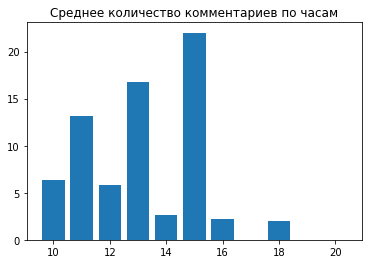

In [364]:
fig, ax = plt.subplots()

plt.bar(df_emergence_hours.index, df_emergence_hours['comments.count','mean'])
ax.set_title('Среднее количество комментариев по часам')
plt.show()

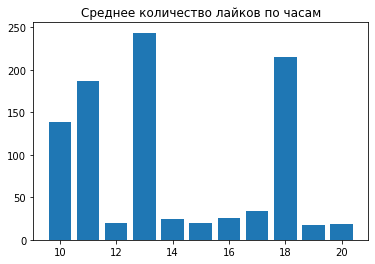

In [365]:
fig, ax = plt.subplots()

plt.bar(df_emergence_hours.index, df_emergence_hours['likes.count','mean'])
ax.set_title('Среднее количество лайков по часам')
plt.show()

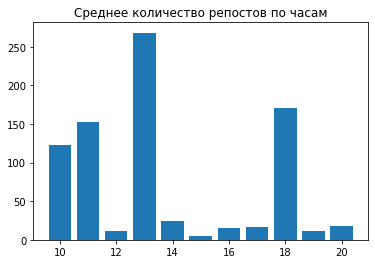

In [366]:
fig, ax = plt.subplots()

plt.bar(df_emergence_hours.index, df_emergence_hours['reposts.count','mean'])
ax.set_title('Среднее количество репостов по часам')
plt.show()

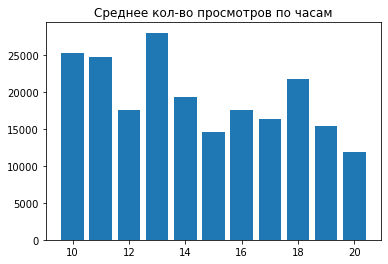

In [367]:
fig, ax = plt.subplots()

plt.bar(df_emergence_hours.index, df_emergence_hours['views.count','mean'])
ax.set_title('Среднее кол-во просмотров по часам')
plt.show()

### Промежуточный вывод

##### Среднее количество комментариев по часам.
На данном графике мы можем наблюдать рост кол-ва комментариев с самого раннего встречающегося поста до края привычного обеденного времени - до 15 часов, далее идет спад. Это легко объясняется тем, что многие, как учащиеся, так и люди рабочие часто вовлечены в свои процессы (учаба/работа), а с ходом времени теряют концентрацию и силы и позволяют себе больше времени тратить на соц. сети, после обеда. Обед чаще всего находится в промежутке с 13 до 14, либо 14 до 15 - отсюда всплеск активности на графиках.  <br>

##### Среднее количество лайков по часам.
Наблюдается похожая ситуация, что и с комментариями, разница лишь в том, что нет бурной активности в 15 часов, а так же мы видим еще один всплеск активности в 18 часов - обычно это конец рабочего дня офисных сотрудников. Скорее всего, факт конца обеда (негативно) и окончания работы (позитивно) сильно влияет на настроение, а значит и на желание людей ставить лайки. <br>

##### Среднее количество репостов по часам .
Картина такая же, как и в случае с лайками. Комментарии избыточны. <br>

##### Среднее количество просмотров по часам.
Самое большое кол-во просмотров достигается в 13 часов, хотя в первой половине дня число так же достаточно большое, хотя в 12 часов мы видим достаточно весомое снижение по просмотрам, нежели в 10 или 11 часов утра, что привносит еще больше уверенности, что на просмотры, лайки, репосты, комментарии влияет свободное благодаря обеду время. Далее мы видим плавный спад до конца дня, исключение из которого составляет время в 18 часов - опять же, я связываю это с окончанием рабочего времени.

### Построим корреляционную матрицу, посмотрим на взаимосвязь между лайками, репостами, комментариями и просмотрами.

In [369]:
corr = df_event.iloc[:,[2,3,4,5,8]].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,comments.count,likes.count,reposts.count,views.count,hour
comments.count,1.00,0.09,0.21,0.36,-0.24
likes.count,0.09,1.00,0.98,0.84,-0.17
reposts.count,0.21,0.98,1.00,0.86,-0.17
views.count,0.36,0.84,0.86,1.00,-0.35
hour,-0.24,-0.17,-0.17,-0.35,1.00


### Коротко опишу взаимосвязь. <br>
Напомню:  <br>
от 0 до 0,3 - очень слабая <br>
от 0,3 до 0,5	слабая <br>
от 0, 5 до 0,7	средняя <br>
от 0,7 до 0, 9	высокая <br>
от 0,9 до 1	очень высокая <br>

Время (час) публиции и кол-во просмотров имеет коэффициент -0.35. Слабая отрицательная корреляция - чем раньше по времени сделана запись, тем больше людей просмотрит пост, как мы отмечали ранее. <br>
Число просмотров высоко коррелирует как с числом репостов, так и с числом лайков, слабая корреляция с числом комментраиев. Тем не менее, чтобы получить максимум отдачи от поста, стоит делать его пораньше - с 10 до 14. На послеобеденное время стоит оставить посты носящие скорее "напоминающий" о группе характер, до обеда - "продающие" посты. <br>
Репосты обладают высокой коррецией с просмотрами (как отмечал выше), а так же очень высокой с лайками. <br>
Все остальные корреляции я уже рассмотрел в ходе описания ранее, но продублирую. <br>
Лайки сильно коррелируют с просмотрами (0.98). Лайки и просмотры связаны на 84% - высокая корреляция. <br>
Комментарии слабо коррелируют с просмотрами, тем не менее, важно понимать, если мы хотим добиться максимальной степени активности "под постом", необходимо серьезно относиться ко времени публикации.

### Проанализировать тексты популярных постов (выше средних по лайкам и прочему) на кол-во слов. Найти повышающие популярность постов слова.

In [436]:
# Возьмем только те записи, которые имеют показатель по лайкам, репостам, комментариям или просмотрам выше средних. 
# ВАЖНО! Берем все записи, что обошли хотя бы 1 средний показатель.

df_best_efficiency = df_event.iloc[:,[2,3,4,5]][df_event > event_statistics.loc['mean']].dropna(how='all')
df_best_efficiency

<ipython-input-436-4ff39cc128ff>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_best_efficiency = df_event.iloc[:,[2,3,4,5]][df_event > event_statistics.loc['mean']].dropna(how='all')


,comments.count,likes.count,reposts.count,views.count
0,58.0,226.0,414.0,37142.0
1,12.0,NaN,NaN,NaN
3,8.0,396.0,342.0,33686.0
4,NaN,NaN,NaN,28855.0
5,26.0,NaN,NaN,NaN
10,NaN,278.0,249.0,35669.0
12,30.0,433.0,368.0,43828.0
13,9.0,NaN,NaN,NaN
15,27.0,NaN,NaN,21782.0
16,16.0,NaN,NaN,NaN


In [525]:
# Возьмем текст каждой записи

all_text = []

for i in df_best_efficiency.index:
    all_text.append(df_event['text'][i])

all_text_together = ''
for i in all_text:
    all_text_together += i
    
word_list = all_text_together.split()

In [561]:
words_counter = {}

for line in word_list:
    line = line.strip(',!')
    line = line.lower()
    words = line.split(" ")

    for word in words:
        if word in words_counter:
            words_counter[word] = words_counter[word] + 1
        else:
            words_counter[word] = 1

In [562]:
words_counter_sort_orders = sorted(words_counter.items(), key=lambda x: x[1], reverse=True)

In [563]:
words_counter_sort_orders

[('в', 56),
 ('и', 37),
 ('—', 26),
 ('на', 23),
 ('что', 17),
 ('не', 15),
 ('а', 15),
 ('для', 14),
 ('вы', 13),
 ('мы', 12),
 ('с', 10),
 ('если', 10),
 ('чтобы', 10),
 ('к', 9),
 ('комментариях', 9),
 ('как', 8),
 ('листайте', 8),
 ('все', 8),
 ('это', 7),
 ('по', 7),
 ('карточки', 7),
 ('вас', 7),
 ('о', 7),
 ('skillbox', 5),
 ('курс', 5),
 ('день', 5),
 ('собрали', 5),
 ('свои', 5),
 ('из', 5),
 ('время', 5),
 ('нашим', 4),
 ('сможете', 4),
 ('за', 4),
 ('бы', 4),
 ('решили', 4),
 ('хотите', 4),
 ('же', 4),
 ('этом', 4),
 ('которые', 4),
 ('но', 4),
 ('от', 4),
 ('самые', 4),
 ('того', 4),
 ('карточках', 4),
 ('вам', 3),
 ('только', 3),
 ('сегодня', 3),
 ('уже', 3),
 ('его', 3),
 ('он', 3),
 ('или', 3),
 ('давайте', 3),
 ('кто', 3),
 ('ответы', 3),
 ('тогда', 3),
 ('которых', 3),
 ('полезные', 3),
 ('напишите', 3),
 ('тем', 3),
 ('приложений', 3),
 ('💛', 3),
 ('деньги', 3),
 ('нет', 2),
 ('попробовать', 2),
 ('именно', 2),
 ('выбирайте', 2),
 ('свой', 2),
 ('записывайтесь', 2),
 

### Промежуточный вывод
Выборка недостаточна, чтобы сделать вывод о том, какие слова способны влиять на популярность поста.

### Посмотрим на теги популярных постов

In [565]:
tegs = re.findall(r'#\w+', str(all_text))
tegs

['#Skillbox_игры',
 '#Skillbox_маркетинг',
 '#Skillbox_программирование',
 '#Skillbox_программирование',
 '#Skillbox_программирование',
 '#Skillbox_программирование',
 '#неткибербуллингу',
 '#Skillbox_программирование']

Перед нами теги самых популярных постов. И даже тут можно выделить своего фаворита - #Skillbox_программирование.

### Какие встречаются теги, могут ли посты с конкретными тегами привлекать больше внимания?

In [576]:
# Найдем все теги встречающиеся под постами
all_posts_text = df_event['text'].tolist()
all_posts_tegs = re.findall(r'#\w+', str(all_posts_text))
unique_posts_tegs = set(all_posts_tegs)
unique_posts_tegs

{'#Skillbox_дизайн',
 '#Skillbox_игры',
 '#Skillbox_маркетинг',
 '#Skillbox_программирование',
 '#Расписание_Skillbox',
 '#неткибербуллингу'}

In [692]:
# Выбросим Nan-строки в тексте постов
df_event_dropna = df_event
df_event_dropna = df_event_dropna.dropna().reset_index(drop=True)

In [743]:
# Создадим отдельные df для каждого тега и посчитаем средние значения по ключевым столбцам-показателям:
# comments.count, likes.count, reposts.count, views.count
df_teg_design = df_event_dropna[df_event_dropna['text'].str.contains('#Skillbox_дизайн')].iloc[:,[2,3,4,5]].mean()
df_teg_games = df_event_dropna[df_event_dropna['text'].str.contains('#Skillbox_игры')].iloc[:,[2,3,4,5]].mean()
df_teg_marketing = df_event_dropna[df_event_dropna['text'].str.contains('#Skillbox_маркетинг')].iloc[:,[2,3,4,5]].mean()
df_teg_programming = df_event_dropna[df_event_dropna['text'].str.contains('#Skillbox_программирование')].iloc[:,[2,3,4,5]].mean()
df_teg_schedule = df_event_dropna[df_event_dropna['text'].str.contains('#Расписание_Skillbox')].iloc[:,[2,3,4,5]].mean()
df_teg_cyberbullying = df_event_dropna[df_event_dropna['text'].str.contains('#неткибербуллингу')].iloc[:,[2,3,4,5]].mean()

In [758]:
# Рассчитаем средние значения ключевых показателей по всем постам
df_event_mean_values = df_event[['comments.count','likes.count','reposts.count','views.count']].mean()

In [759]:
# Посчитаем соотношение значений средних показателей по каждому тегу к общим средним значениям
df_teg_design_total_share = df_teg_design / df_event_mean_values
df_teg_games_total_share = df_teg_games / df_event_mean_values
df_teg_marketing_total_share = df_teg_marketing / df_event_mean_values
df_teg_programming_total_share = df_teg_programming / df_event_mean_values
df_teg_schedule_total_share = df_teg_schedule / df_event_mean_values
df_teg_cyberbullying_total_share = df_teg_cyberbullying / df_event_mean_values

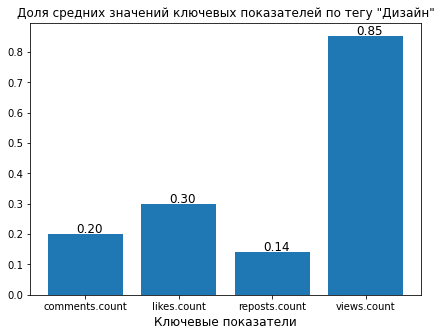

In [832]:
fig, ax = plt.subplots(figsize=(7,5))
plt.bar(df_teg_design_total_share.index, df_teg_design_total_share)
ax.set_title('Доля средних значений ключевых показателей по тегу "Дизайн"')
ax.set_xlabel('Ключевые показатели', fontsize=12)

for pos, val in enumerate(df_teg_design_total_share.values):
    ax.annotate(format(val, '.2f'), xy=(pos-0.1, val+0.004), fontsize=12)
    
plt.show()

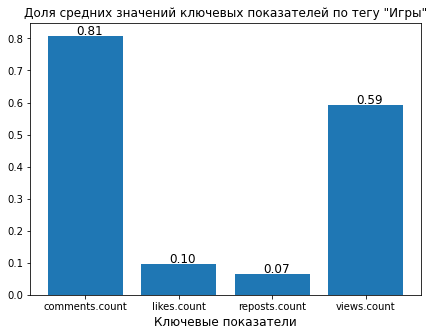

In [833]:
fig, ax = plt.subplots(figsize=(7,5))
plt.bar(df_teg_games_total_share.index, df_teg_games_total_share)
ax.set_title('Доля средних значений ключевых показателей по тегу "Игры"')
ax.set_xlabel('Ключевые показатели', fontsize=12)

for pos, val in enumerate(df_teg_games_total_share.values):
    ax.annotate(format(val, '.2f'), xy=(pos-0.1, val+0.004), fontsize=12)
    
plt.show()

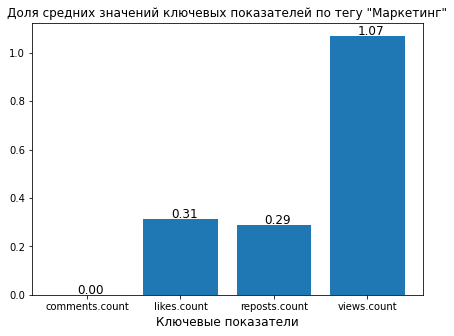

In [850]:
fig, ax = plt.subplots(figsize=(7,5))
plt.bar(df_teg_marketing_total_share.index, df_teg_marketing_total_share)
ax.set_title('Доля средних значений ключевых показателей по тегу "Маркетинг"')
ax.set_xlabel('Ключевые показатели', fontsize=12)

for pos, val in enumerate(df_teg_marketing_total_share.values):
    ax.annotate(format(val, '.2f'), xy=(pos-0.1, val+0.004), fontsize=12)

plt.show()

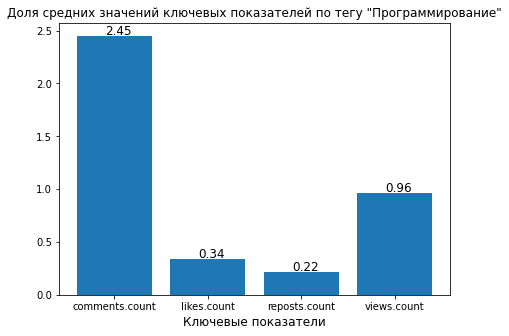

In [854]:
fig, ax = plt.subplots(figsize=(7,5))
plt.bar(df_teg_programming_total_share.index, df_teg_programming_total_share)
ax.set_title('Доля средних значений ключевых показателей по тегу "Программирование"')
ax.set_xlabel('Ключевые показатели', fontsize=12)

for pos, val in enumerate(df_teg_programming_total_share.values):
    ax.annotate(format(val, '.2f'), xy=(pos-0.1, val+0.01), fontsize=12)

plt.show()

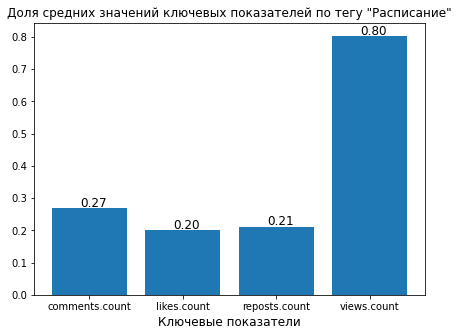

In [857]:
fig, ax = plt.subplots(figsize=(7,5))
plt.bar(df_teg_schedule_total_share.index, df_teg_schedule_total_share)
ax.set_title('Доля средних значений ключевых показателей по тегу "Расписание"')
ax.set_xlabel('Ключевые показатели', fontsize=12)

for pos, val in enumerate(df_teg_schedule_total_share.values):
    ax.annotate(format(val, '.2f'), xy=(pos-0.1, val+0.005), fontsize=12)
    
plt.show()

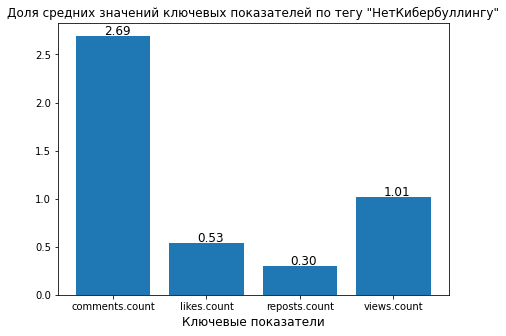

In [858]:
fig, ax = plt.subplots(figsize=(7,5))
plt.bar(df_teg_cyberbullying_total_share.index, df_teg_cyberbullying_total_share)
ax.set_title('Доля средних значений ключевых показателей по тегу "НетКибербуллингу"')
ax.set_xlabel('Ключевые показатели', fontsize=12)

for pos, val in enumerate(df_teg_cyberbullying_total_share.values):
    ax.annotate(format(val, '.2f'), xy=(pos-0.1, val+0.015), fontsize=12)
    
plt.show()

### Промежуточный вывод

-Тег #Skillbox_дизайн обладает малой привлекательностью, средние значения по нему сильно ниже, а самый наилучший его показатель - число просмотров отстает на 15% от общего среднего значения. <br>
-Тег #Skillbox_игры так же весомо не дотягивает до средних значених, лучший показатель - комментарии - остает от среднего на 19%. <br>
-Тег #Skillbox_маркетинг обошел средний показатель по числу просмотров на 7%, по прочим он сильно отстает. В комментариях он не вызвал абсолютно никакого отклика пользователей - активность нулевая. <br>
-Тег #Skillbox_программирование - невероятные 245% от среднего значения комментариев, совсем небольшое отставание по просмотрам - на 9%, прочие показатели низки. <br>
-Тег #Расписание_Skillbox - не достиг средних значений ни по одному критерию. Лучший - просмотры, отстает на 20% от среднего. <br>
-Тег #неткибербуллингу - имеет непревзойденный отклик аудитории в комментариях - 269% от среднего. Вероятно, что это связано с нехарактерным для группы тегом. Так же обошел на 1% средний показатель по просмотроам. Увы, лайки и репосты проседают. <br>

### Вглянем на текст постов, что обошли все средние показатели одновременно

In [866]:
# Отсортируем df по всем ключевым показателям
df_event.iloc[:,[2,3,4,5]][df_event > event_statistics.loc['mean']].dropna()

<ipython-input-866-576c81d84cb3>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_event.iloc[:,[2,3,4,5]][df_event > event_statistics.loc['mean']].dropna()


,comments.count,likes.count,reposts.count,views.count
0,58.0,226.0,414.0,37142.0
3,8.0,396.0,342.0,33686.0
12,30.0,433.0,368.0,43828.0


In [876]:
print('Час публикации:', df_event['hour'].iloc[0])
print(df_event['text'].iloc[0])

Час публикации: 13
Нет, это не шутка! Попробовать 34 курса и интенсива Skillbox совершенно бесплатно 🤩

На целую неделю мы даем вам свободный доступ к нашим лекциям. Вы сможете попробовать себя в роли флориста, изучить основы Python, приглядеться к профессии PR-менеджера — в общем, познакомиться с кухней той специальности, которая интересна именно вам. 

Выбирайте свой курс и записывайтесь по ссылке: https://vk.cc/c0pI0X.


In [877]:
print('Час публикации:', df_event['hour'].iloc[3])
print(df_event['text'].iloc[3])

Час публикации: 11
Понедельник — день тяжелый! Чтобы сделать его чуточку легче, мы решили представить, каким был бы рабочий день, если бы он был книгой.

Хотите узнать, что у нас получилось? Листайте карточки!

А в комментариях опишите свой день через название книги 👇


In [878]:
print('Час публикации:', df_event['hour'].iloc[12])
print(df_event['text'].iloc[12])

Час публикации: 11
Недавно подписчик задал нам вопрос: «Как интроверту находить друзей?»
Мы решили устроить анонимный опрос интровертов Skillbox, чтобы узнать, а как же им удается социализироваться. Ответы оказались неоднозначными 😅 — делимся ими в карточках. 

Если вы тоже интроверт в поиске друзей, напишите в комментариях о себе буквально в трех словах. Все, кто лайкнет ваш комментарий, — готовы к общению, а значит, можно написать им в директ  😉

Ну и, в свою очередь, не стесняйтесь ставить лайки тем, чей комментарий вам пришелся по душе 🤗


### Промежуточный вывод

Один из постов-лидеров несет заманчивый посыл с "халявой". Замечу так же, что время публикации - 13 часов, как отмечалось ранее - это едва ли не лучшее время, чтобы зацепить массовую аудиторию в моменте. <br>
Остальные два создают интригу, судя по описанию, вся информацию предоставляется в неких "карточках", вероятно, это серия коротких описаний в картинках, как результат - лучшие показатели по всем четырем ключевым показателям. Время публикации - первая половина дня - 11 часов. <br>
Хочется напомнить, что ранее мы уже отмечали один из постов с высоким результатом, где так же фигурировали "карточки". (Пост, который обошел закрепленный по трем ключевым показателям: просмотры, лайки, репосты).

### Итоги: 
Событие "Черная пятница", действительно, работает и аккумулирует активность в группе - посты получают большее внимание со стороны аудитории. <br>
Посты которые ссылаются на информацию в "карточках" имеют высокую популярность. <br>
Чтобы пост имел больше шансов быть замеченным и набрал большие значения по ключевым показателям, он должен быть размещен в первой половине для - до 15 часов. Второй шанс - это посты в 18 часов - репосты и лайки будут высокими. Стоит избегать периода с 15 до 18 часов - посты могут затеряться на фоне других групп. <br>
Посты с темой (под тегом) "Программирование" вызывают хороший отклик в комментариях группы. <br>
Посты с необычными темами, в нашем случае тег #НетКибербуллингу, могут иметь невероятный результат. Администрации сообщества стоит дальше экспериментировать и продожать поднимать обсуждаемые во всем мире темы - такое способно привлечь особое внимание аудитории.
